# pothole detection PROJECT

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras 
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from PIL import Image
plt.style.use('dark_background')
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical,plot_model
import os

In [37]:
encoder=OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

In [38]:
#pothole images pothole-1,normal-0
data=[]
paths=[]
result=[]
for r,d,f in os.walk(r"D:\anjali\potholes"):
    for file in f:
        if '.jpeg'or'jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
    

In [39]:
paths=[]
for r,d,f in os.walk (r"D:\anjali\normal"):
    for file in f:
        if '.jpeg'or'jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        

In [46]:
data=np.array(data)
data.shape

(679, 128, 128, 3)

In [42]:
result=np.array(result)
result=result.reshape(679,2)

# VISUALIZATION OF IMAGES

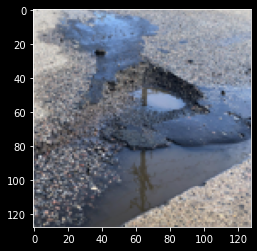

In [8]:
plt.imshow(data[0])

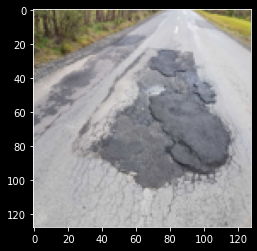

In [9]:
plt.imshow(data[150])

# DATA SPLITTING

In [10]:
x_train,x_test,y_train,y_test=train_test_split(data,result,test_size=0.2,shuffle=True,random_state=45)

# MODEL CREATION (Resnet50 MODEL)

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
input_shape=(128,128,3)
num_classes=2

In [14]:
base_model=ResNet50(weights='imagenet',include_top=False,input_shape=input_shape)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [15]:
for layer in base_model.layers:
    layer.trainable=False

In [17]:
x=base_model.output
x=layers.GlobalAveragePooling2D()(x)
x=layers.Dense(256,activation='relu')(x)
x=layers.Dropout(0.5)(x)
predictions=layers.Dense(num_classes,activation='sigmoid')(x)
model=models.Model(inputs=base_model.input,outputs=predictions)

# MODEL CONFIGURATION

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
train_datagen=ImageDataGenerator(
rescale=1.0/255,
rotation_range=20,
width_shift_range=0.2,
height_shift_range=0.2,
horizontal_flip=True
)
test_datagen=ImageDataGenerator(rescale=1.0/255)

In [22]:
batch_size=32
train_generator=train_datagen.flow(x_train,y_train,batch_size=batch_size)
test_generator=test_datagen.flow(x_test,y_test,batch_size=batch_size)

# MODEL TRAINING

In [23]:
epochs=20
history= model.fit(train_generator,epochs=epochs,validation_data=test_generator)

Epoch 1/20


C:\Users\nair7\AppData\Roaming\Python\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5241 - loss: 0.7320 - val_accuracy: 0.5368 - val_loss: 0.6861
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5514 - loss: 0.6946 - val_accuracy: 0.7059 - val_loss: 0.6847
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5187 - loss: 0.6909 - val_accuracy: 0.5368 - val_loss: 0.6768
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5167 - loss: 0.6970 - val_accuracy: 0.5515 - val_loss: 0.6771
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5720 - loss: 0.6862 - val_accuracy: 0.5882 - val_loss: 0.6782
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5806 - loss: 0.6819 - val_accuracy: 0.5368 - val_loss: 0.6746
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5985 - loss: 0.6775 - val_accuracy: 0.5809 - val_loss: 0.6694
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5814 - loss: 0.6791 - val_accuracy: 0.7059 - val_loss: 0.6770
Epo

In [24]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"test accuracy :{test_acc}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 804ms/step - accuracy: 0.4607 - loss: 1.4367
test accuracy :0.4485294222831726


In [25]:
model.save('pothole_plain_resnet_model.h5')

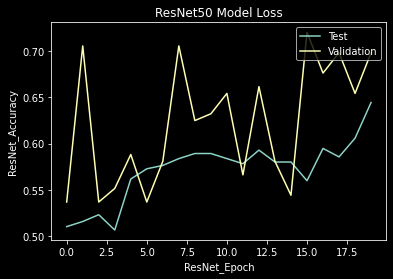

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ResNet50 Model Loss')
plt.ylabel('ResNet_Accuracy')
plt.xlabel('ResNet_Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.savefig('pothole_Accuracy_map_ResNet50.jpg')
plt.show()

In [49]:
def names(number):
    if number==0:
        return 'normal road'
    else:
        return'there is pothole in the road'

# MODEL PREDICTION

46.2276816368103% confidence this is normal road


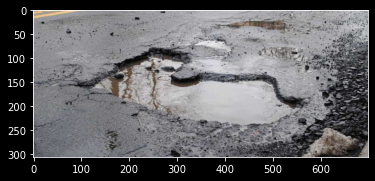

In [50]:
from matplotlib.pyplot import imshow
img=Image.open(r"D:\anjali\potholes\21.jpg")
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+'% confidence this is '+names(classification))

37.858760356903076% confidence this isthere is pothole in the road


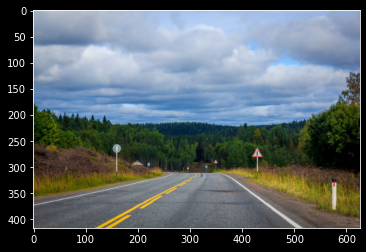

In [51]:
from matplotlib.pyplot import imshow
img=Image.open(r"D:\anjali\normal\172.jpg")
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% confidence this is' +names(classification))

# MODEL CREATION(Efficient NetB0 Model)

In [52]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D

In [54]:
base_model=EfficientNetB0(weights='imagenet',include_top=False,input_shape=(128,128,3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [56]:
model=Sequential() 
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='sigmoid'))


# MODEL CONFIGURATION

In [57]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

# MODEL TRAINING

In [59]:
history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.8864 - loss: 0.3574 - val_accuracy: 0.9853 - val_loss: 0.0396
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9640 - loss: 0.0590 - val_accuracy: 0.9706 - val_loss: 0.0546
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9925 - loss: 0.0205 - val_accuracy: 0.9779 - val_loss: 0.0604
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.9956 - loss: 0.0225 - val_accuracy: 0.9706 - val_loss: 0.1188
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9881 - loss: 0.0326 - val_accuracy: 0.9338 - val_loss: 0.3894
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9954 - loss: 0.0166 - val_accuracy: 0.9485 - val_loss: 0.2239
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9839 - loss: 0.0302 - val_accuracy: 0.9706 - val_loss: 0.1161
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9731 - loss: 0.0504 - val_accuracy: 0.9853 - val_loss:

In [60]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test accuracy :",test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.9895 - loss: 0.0322
Test accuracy : 0.9852941036224365


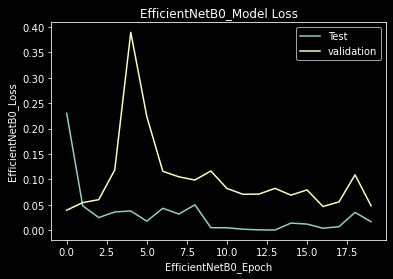

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('EfficientNetB0_Model Loss')
plt.xlabel('EfficientNetB0_Epoch')
plt.ylabel('EfficientNetB0_Loss')
plt.legend(['Test','validation'],loc='upper right')
plt.savefig('Loss_EfficientNetB0.jpg')
plt.show()

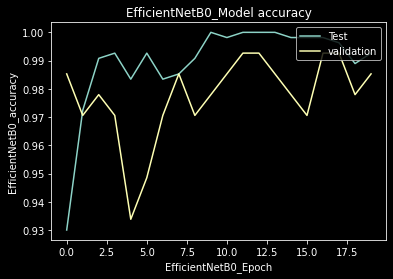

In [65]:
plt.plot(history.history['accuracy'])
plt.plot (history.history['val_accuracy'])
plt.title('EfficientNetB0_Model accuracy')
plt.ylabel('EfficientNetB0_accuracy')
plt.xlabel('EfficientNetB0_Epoch')
plt.legend(['Test','validation'],loc='upper right')
plt.savefig('Loss_EfficientNetB0.jpg')
plt.show()

# FINAL PREDICTION

100.0% confidence This is anormal road


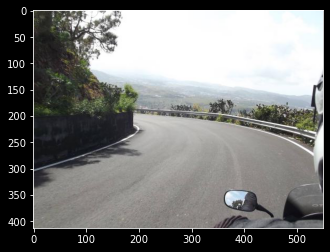

In [66]:
from matplotlib.pyplot import imshow
img=Image.open(r"D:\anjali\normal\30.jpg")
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+'% confidence This is a '+names(classification))

99.99998211860657% confidence this is athere is pothole in the road


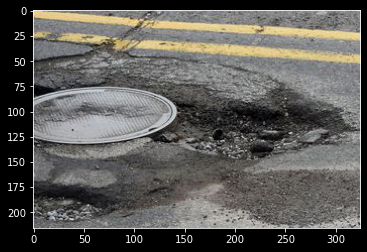

In [70]:
from matplotlib.pyplot import imshow
img=Image.open(r"D:\anjali\potholes\30.jpg")
x=np.array(img.resize((128,128)))
x=x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+'% confidence this is a '+names(classification))